In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from wrf import getvar, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords, to_np

In [2]:
OBS_LAT = 37.354621121280424
OBS_LON = -108.43818826792396

ncfile = Dataset('no_eclipse/geo_em.d01.nc','r')
hgt_d01 = getvar(ncfile,'HGT_M')
lats_d01,lons_d01 = latlon_coords(hgt_d01)
cart_proj = get_cartopy(hgt_d01)
xlim_d01 = wrf.cartopy_xlim(hgt_d01)
ylim_d01 = wrf.cartopy_ylim(hgt_d01)

ncfile = Dataset('no_eclipse/geo_em.d02.nc','r')
hgt_d02 = getvar(ncfile,'HGT_M')
lats_d02,lons_d02 = latlon_coords(hgt_d02)
xlim_d02 = wrf.cartopy_xlim(hgt_d02)
ylim_d02 = wrf.cartopy_ylim(hgt_d02)

ncfile = Dataset('no_eclipse/geo_em.d03.nc','r')
hgt_d03 = getvar(ncfile,'HGT_M')
lats_d03,lons_d03 = latlon_coords(hgt_d03)
xlim_d03 = wrf.cartopy_xlim(hgt_d03)
ylim_d03 = wrf.cartopy_ylim(hgt_d03)

+proj=lcc +a=6370000.0 +b=6370000.0 +nadgrids=@null +lon_0=-109.454 +lat_0=40.034992 +x_0=0.0 +y_0=0.0 +lat_1=40.035 +lat_2=40.035 +no_defs +type=crs


NameError: name 'wrf' is not defined

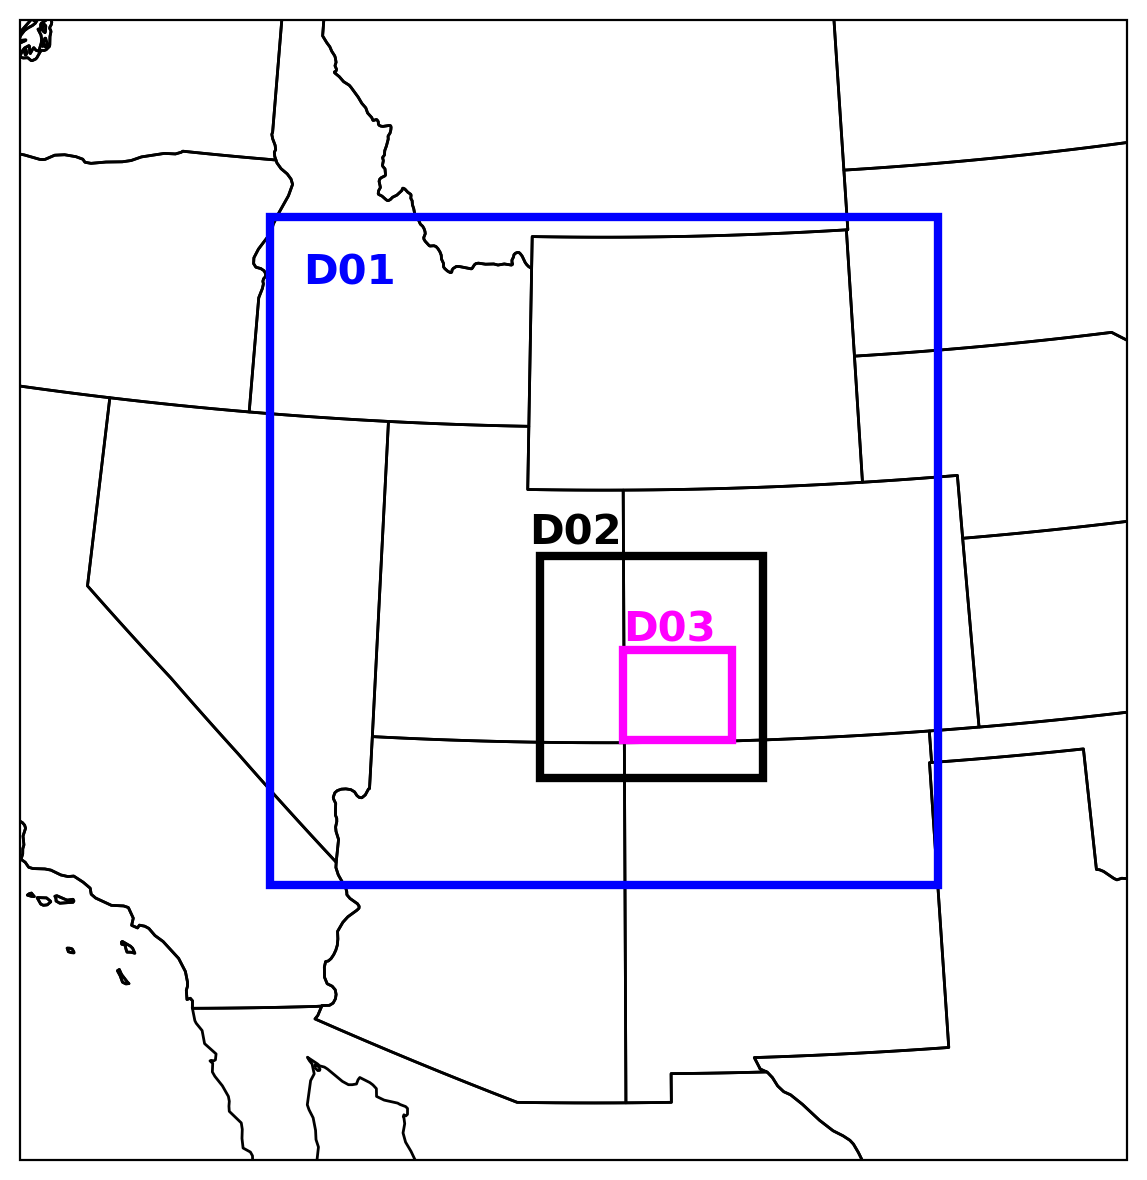

In [66]:
fig = plt.figure(figsize=(6,6),dpi=200)
ax = plt.axes(projection=cart_proj)

ax.set_extent([-120,-100,30,48])
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
#ax.coastlines('50m', linewidth=0.8)
#plt.pcolormesh(to_np(lons_d01), to_np(lats_d01), to_np(hgt_d01),
#             transform=ccrs.PlateCarree(),vmin=0,vmax=4000,
#             cmap='terrain')
#plt.pcolormesh(to_np(lons_d02), to_np(lats_d02), to_np(hgt_d02),
#             transform=ccrs.PlateCarree(),vmin=0,vmax=4000,
#             cmap='terrain')
#plt.pcolormesh(to_np(lons_d03), to_np(lats_d03), to_np(hgt_d03),
#             transform=ccrs.PlateCarree(),vmin=0,vmax=4000,
#             cmap='terrain')
#plt.colorbar(orientation='horizontal')

ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 'D01',
        size=15, weight='bold', color='blue', zorder=10)
ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))
ax.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*-0.05, ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.05, 'D02',
        size=15, weight='bold', color='black', zorder=10)
ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
             fill=None, lw=3, edgecolor='magenta', zorder=10))
ax.text(xlim_d03[0]+(xlim_d03[1]-xlim_d03[0])*0.0, ylim_d03[0]+(ylim_d03[1]-ylim_d03[0])*1.1, 'D03',
        size=15, weight='bold', color='magenta', zorder=10)


plt.tight_layout()

plt.savefig('domains.png',bbox_inches='tight')

/research/modules/mpich/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/tmp/ipykernel_165061/3354910917.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


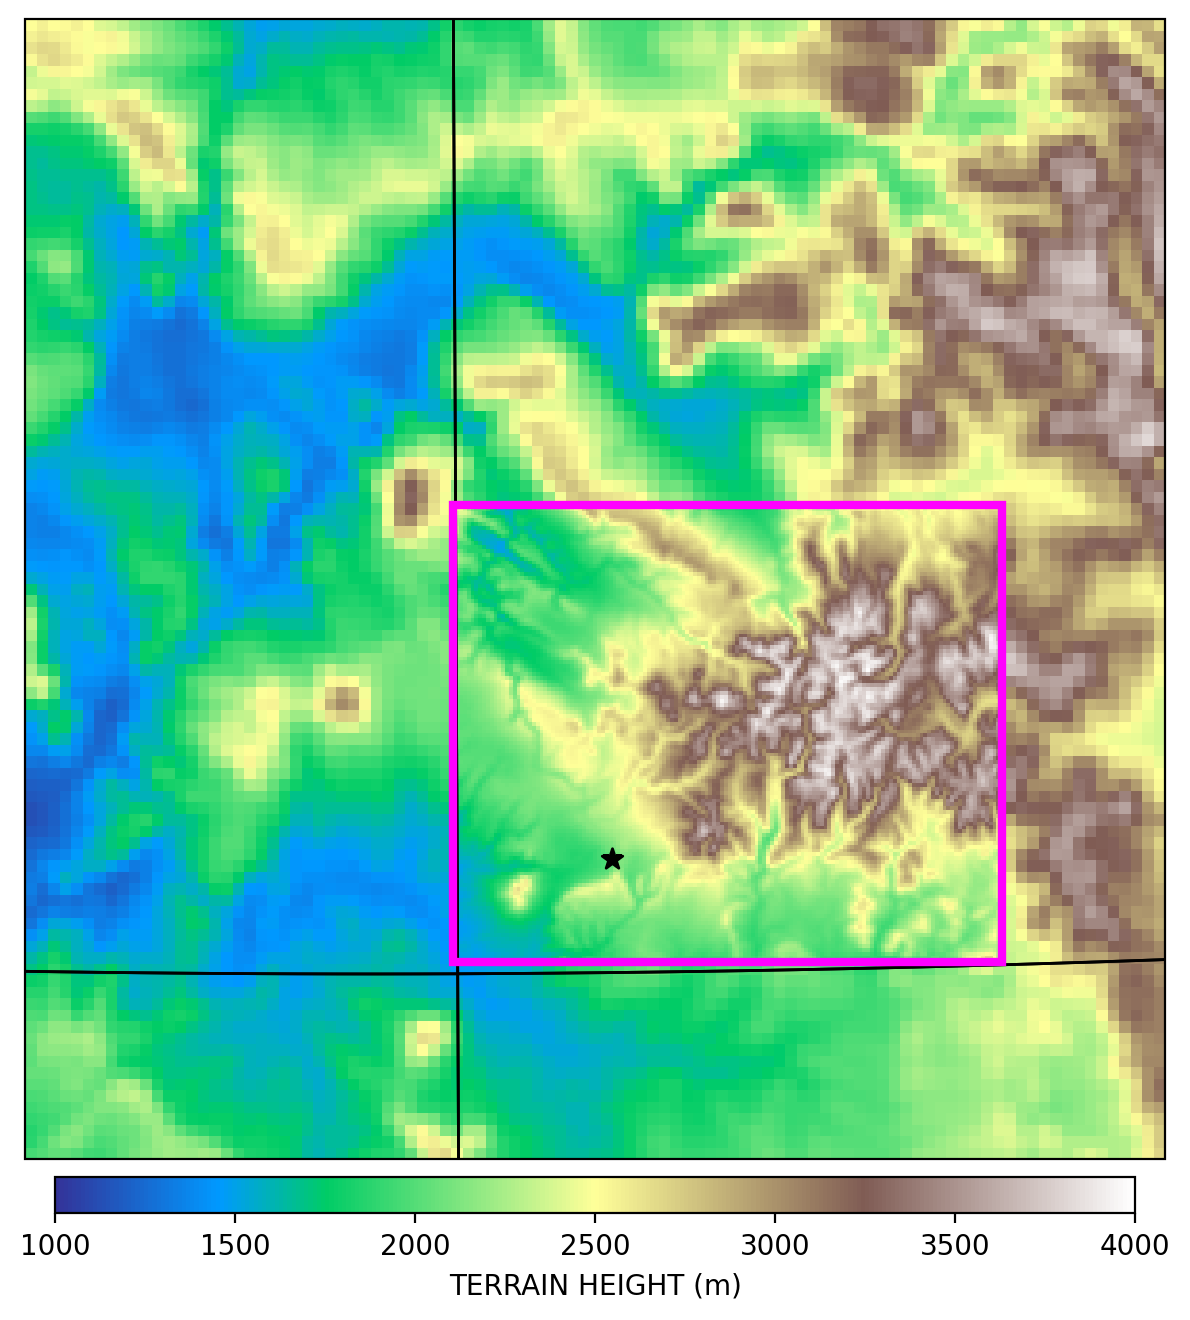

In [86]:
fig = plt.figure(figsize=(6,6),dpi=200)
ax = plt.axes(projection=cart_proj)

ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
#ax.coastlines('50m', linewidth=0.8)
#plt.pcolormesh(to_np(lons_d01), to_np(lats_d01), to_np(hgt_d01),
#             transform=ccrs.PlateCarree(),vmin=0,vmax=4000,
#             cmap='terrain')
hm = plt.pcolormesh(to_np(lons_d02), to_np(lats_d02), to_np(hgt_d02),
             transform=ccrs.PlateCarree(),vmin=1000,vmax=4000,
             cmap='terrain')
plt.pcolormesh(to_np(lons_d03), to_np(lats_d03), to_np(hgt_d03),
             transform=ccrs.PlateCarree(),vmin=1000,vmax=4000,
             cmap='terrain')

ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
             fill=None, lw=3, edgecolor='magenta', zorder=10))

plt.scatter(OBS_LON,OBS_LAT,marker='*',color='k',s=60,transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.05, -0.02, 0.90, 0.03])
fig.colorbar(hm, cax=cbar_ax, orientation='horizontal', label='TERRAIN HEIGHT (m)')

plt.tight_layout()
plt.savefig('WRF_terrain.png',bbox_inches='tight')